<a href="https://colab.research.google.com/github/dextopman/flipkart_reviews_analysis/blob/main/Flipkart_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flipkart Reviews Sentiment Analysis using Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/flipkart_data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



 To analyse the data of the reviews and ratings user gives on Flipkart to make others aware of their experience
 and morever about the product and brand

 ### To predict whether the review given is positive or negative

In [ ]:
'''
Libraries we will be using

1. Pandas : for importing the data.

2. Scikit-learn : for importing the model, accuracy module and TfidfVectorizor.

3. Warning: To ignore all the warnings.

4. Matplotlib : To plot the visualization.

5. Wordcloud : To plot word visualization.

6.Seaborn : For data visualization


'''

'\nLibraries we will be using\n\n1. Pandas : for importing the data.\n\n2. Scikit-learn : for importing the model, accuracy module and TfidfVectorizor.\n\n3. Warning: To ignore all the warnings.\n\n4. Matplotlib : To plot the visualization.\n\n5. Wordcloud : To plot word visualization.\n\n6.Seaborn : For data visualization\n\n\n'

In [ ]:
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### We will be using NLTK library and from that we will import stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
data = pd.read_csv(path, error_bad_lines=False)

In [ ]:
data.head(4)

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5


## Preprocessing and Cleaning the review

As, the real data is multi-labelled, so firstly explore those labels then we will convert them into 2 classes.

In [ ]:
pd.unique(data['rating'])

array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

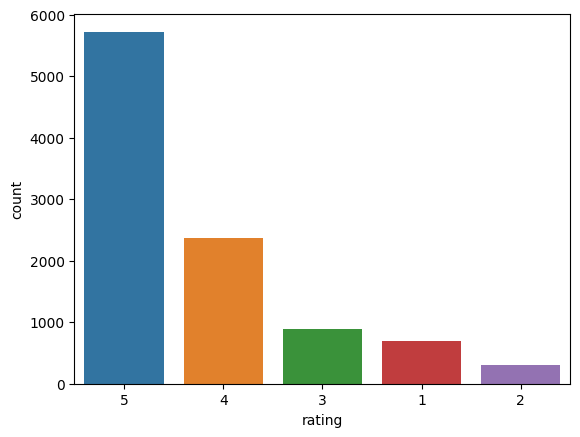

In [ ]:
sns.countplot(data=data, x='rating',
             order=data.rating.value_counts().index) ## Building countplot

To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0), we need to change the rating column into an another column of 0s and 1s category. For that the condition will be like if the rating is less than or equal to 4, then it is negative(0) else positive(1).

In [ ]:
pos_neg = []

for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg

In [ ]:
## function to preprocess the dataset

from tqdm import tqdm

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence) ## Removing Punctuations

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower()
                                        for token in nltk.word_tokenize(sentence)
                                        if token.lower() not in stopwords.words('english')))

    return preprocessed_text


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
## implementing the function for the dataset

preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

100%|██████████| 9976/9976 [00:28<00:00, 355.21it/s]


In [ ]:
data.head(5)

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


## Analysis of the dataset

Let’s check out that how many counts are there for positive and negative sentiments.

In [ ]:
data["label"].value_counts()

1    5726
0    4250
Name: label, dtype: int64

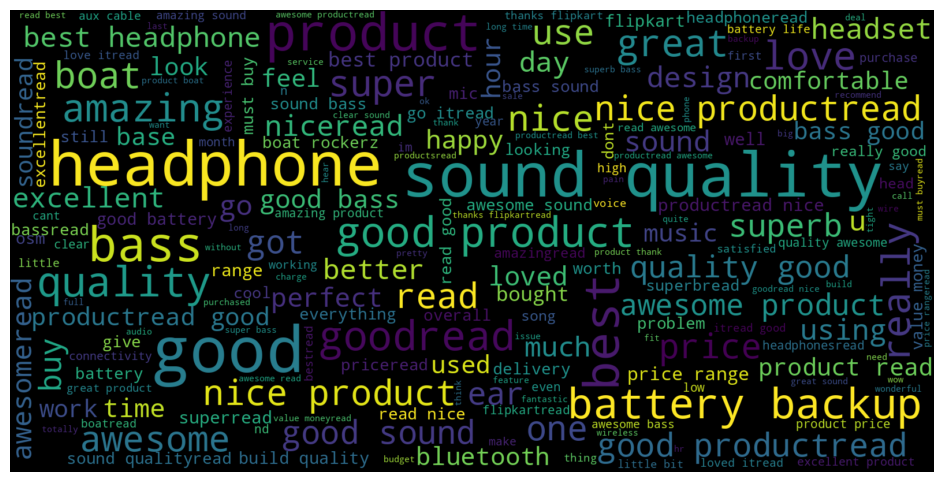

In [ ]:
consolidated = ' '.join(
    word for word in data['review'][data['label']==1].astype(str))
wordcloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

It seems **good**, **sound**, **quality, product** have higher frequency in positive review.

## Converting text into vectors

TF-IDF calculates that how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review']).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model Training, Evaluation and Prediction

Once analysis and vectorization is done. We can now explore any machine learning model to train the data. But before that  we perform the train-test split.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, data['label'],test_size=0.33, stratify=data['label'], random_state=42)

We can now train any models. Lets build Decision Tree for predicting the data.

Decision Tree : A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks.

1.It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

2.It is constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)

pred = model.predict(X_train)
print(accuracy_score(Y_train,pred))

0.9247344007182403


## Building Confusion Matrix

Confusion Matrix : A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data.

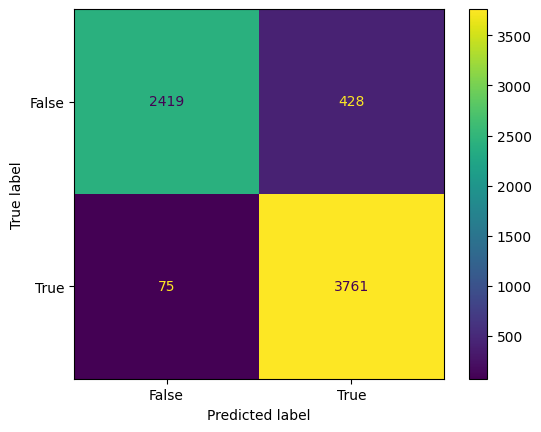

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
cm_display.plot()
plt.show()

## Conclusion

Decision Tree Classifier is performing well in this data. We can also use in large data by scraping througth the website.